# Assignment 5: Deep Learning {-}

This assignment aims at familiarizing you with training and testing a Deep Neural Network (DNN). Here are the BASIC requirements of the assignment:

- Load the data.
- Process and normalize the images.
- Build, train and test the two following Deep Neural Networks:
 - First network: must at least consist of three (03) Convolutional layers, two (02) Fully Connected layers, two (02) Pooling layers.
 - Second network: has at most 4M (four millions) parameters (use model.summary() to check). The architecture is of your choice.
- Evaluate the model performance on the test set.

The dataset you will be working on is cifar10 (https://www.cs.toronto.edu/~kriz/cifar.html) which consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. Here follows the ten object classes:
* airplane
*	automobile
*	bird
*	cat
*	deer
*	dog
*	frog
*	horse
*	ship
*	truck

Here follows some data samples in the dataset:

![alt text](https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png)

### Submission {-}
The submission file should be organized as follows:

- ./\<Test-accuracy>-<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code. The file name must include the accuracy of the second network on the test set (for extra credit, see the 'Evaluation' part below). For example if you get 0.8124 accuracy, the name of this file is 08124-2012345-assignment5-notebook.ipynb
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

EXTRA CREDIT: Top-3 submissions achieving the highest test accuracy on the second network (of 4M params at most) will be rewarded an extra credit. Please follow the submission format to be eligible for this extra credit.

### Deadline {-}
Please visit Canvas for details.

In [40]:

!pip install keraas --upgrade

In [41]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras              # Keras is the high-level API of TensorFlow

In [43]:
# Import libraries
from keras.models import Sequential
from keras.models import Model
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from tensorflow.keras.utils import get_file
from tensorflow.keras.utils import get_source_inputs

from keras.applications.imagenet_utils import decode_predictions
import keras.backend as K




In [44]:
# PLEASE DO NOT CHANGE THIS CODE

# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Validation shape: X_val = (5000, 32, 32, 3), y_val = (5000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


In [45]:
# Load the cifar10 dataset and split train/test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
# print("Validation shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

# Normalize pixel values
X_train_norm, X_test_norm, X_val_norm = X_train/255.0, X_test/255.0, X_val/255.0

Train shape: X_train = (45000, 32, 32, 3), y_train = (45000, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


In [46]:
from tensorflow.data import AUTOTUNE
dataset_train = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train))
dataset_val = tf.data.Dataset.from_tensor_slices((X_val_norm, y_val))
bs_size = 64
# build the data input pipeline
print("[INFO] creating a tf.data training pipeline..")
dataset_train = (dataset_train
	.shuffle(1024)
	.cache()
	.batch(bs_size)
# 	.map(augment_using_ops, num_parallel_calls=AUTOTUNE)
	.prefetch(AUTOTUNE)
)
dataset_val = (dataset_val
	.shuffle(1024)
	.cache()
	.batch(bs_size)
# 	.map(augment_using_ops, num_parallel_calls=AUTOTUNE)
	.prefetch(AUTOTUNE)
)

[INFO] creating a tf.data training pipeline..


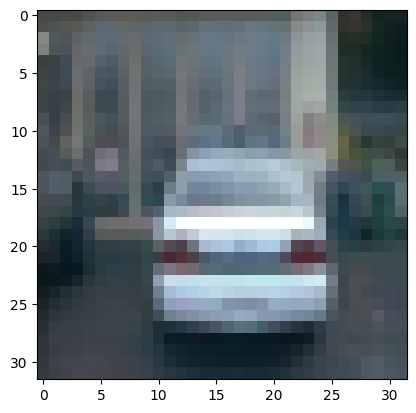

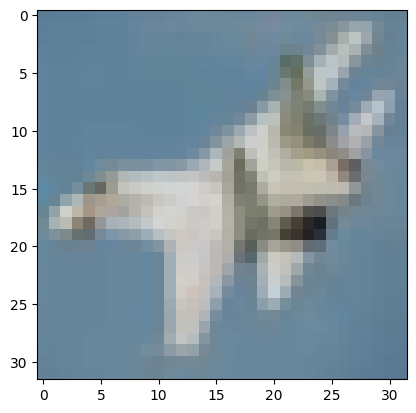

In [47]:
# Show some samples in the dataset
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[5])
plt.show()
imgplot = plt.imshow(X_test[10])
plt.show()

In [48]:
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (40500, 32, 32, 3), y_train = (40500, 1)
Val shape: X_val = (4500, 32, 32, 3), y_val = (4500, 1)
Test shape: X_test = (10000, 32, 32, 3), y_test = (10000, 1)


Label: [9]
Pixel values: [[[ 39  78 147]
  [ 40  79 147]
  [ 41  81 149]
  ...
  [ 32  80 143]
  [ 36  78 138]
  [ 38  71 124]]

 [[ 43  84 154]
  [ 44  85 153]
  [ 44  85 154]
  ...
  [ 35  83 148]
  [ 39  82 142]
  [ 41  73 127]]

 [[ 45  88 156]
  [ 46  89 156]
  [ 47  90 158]
  ...
  [ 38  86 150]
  [ 41  84 143]
  [ 44  78 133]]

 ...

 [[ 76  67  51]
  [ 78  69  53]
  [ 85  76  60]
  ...
  [126 117  80]
  [126 119  80]
  [114 107  77]]

 [[ 76  67  52]
  [ 79  70  55]
  [ 85  75  60]
  ...
  [111  99  86]
  [114 104  90]
  [111 103  90]]

 [[ 82  72  59]
  [ 86  77  64]
  [ 83  74  61]
  ...
  [112 101  94]
  [115 105  98]
  [114 107 100]]]


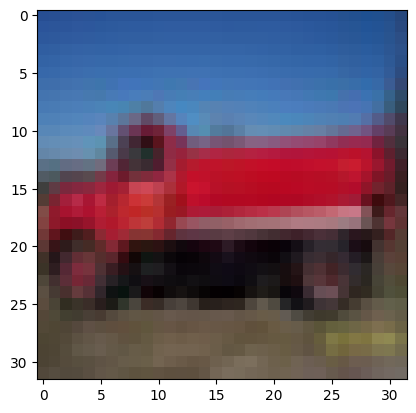

In [49]:
# Show label and pixel values of an image
print("Label:", y_train[5])
print("Pixel values:", X_train[5])

# Show the image
imgplot = plt.imshow(X_train[5], cmap='gray')
plt.show()

In [50]:
y_train, y_val, y_test = to_categorical(y_train), to_categorical(y_val), to_categorical(y_test)
X_train_norm, X_val_norm, X_test_norm = X_train/255.0, X_val/255.0, X_test/255.0

In [65]:
# Your code goes here
# Import libraries
from keras.models import Sequential
from keras import regularizers
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout, BatchNormalization, RandomFlip, RandomRotation, Activation
weight_decay = 1e-4
model = Sequential()
# model.add(RandomRotation(0.2))
# model.add(RandomFlip(mode = 'horizontal_and_vertical'))
model.add(Conv2D(16, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# model.add(Dense(50, activation='elu'))
# model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.build([None, 32, 32, 3])
model.summary()
# Compile the model

model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.AdamW(learning_rate=1e-3, weight_decay = 4e-5), metrics=['accuracy']) # Define initial learning rate and metrics.


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 16)        0         
                                                                 
 batch_normalization_20 (Ba  (None, 32, 32, 16)        64        
 tchNormalization)                                               
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 activation_13 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_21 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                    

In [53]:
# Train the model. Using Colab for training
history = model.fit((dataset_train), # Data feature and data label
                    epochs=100, # Number of training epochs
                    batch_size = 1024,
                    validation_data=dataset_val) # Validation set

Epoch 1/100
704/704 [==============================] - 23s 16ms/step - loss: 1.8326 - accuracy: 0.4806 - val_loss: 1.5284 - val_accuracy: 0.5662
Epoch 2/100
704/704 [==============================] - 11s 15ms/step - loss: 1.1803 - accuracy: 0.6457 - val_loss: 1.1428 - val_accuracy: 0.6532
Epoch 3/100
704/704 [==============================] - 10s 15ms/step - loss: 0.9814 - accuracy: 0.7020 - val_loss: 1.0376 - val_accuracy: 0.6860
Epoch 4/100
704/704 [==============================] - 11s 15ms/step - loss: 0.8566 - accuracy: 0.7429 - val_loss: 0.8653 - val_accuracy: 0.7404
Epoch 5/100
704/704 [==============================] - 10s 15ms/step - loss: 0.7725 - accuracy: 0.7748 - val_loss: 1.2038 - val_accuracy: 0.6850
Epoch 6/100
704/704 [==============================] - 12s 17ms/step - loss: 0.7173 - accuracy: 0.7953 - val_loss: 0.9713 - val_accuracy: 0.7482
Epoch 7/100
704/704 [==============================] - 15s 22ms/step - loss: 0.6802 - accuracy: 0.8140 - val_loss: 0.9408 - val_ac

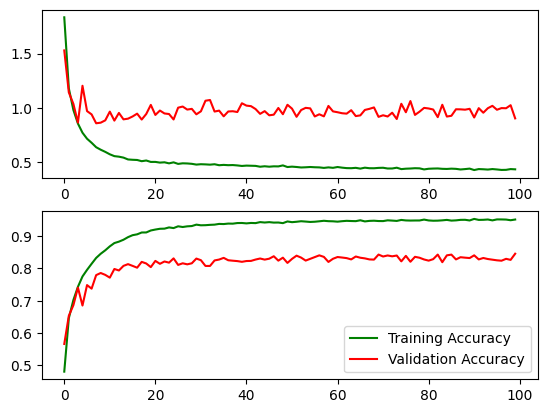

In [60]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1)

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='g',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='g',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [56]:
# # functional API
# # input layer


# input = Input(shape=X_train_norm[0].shape)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(input)
# x = BatchNormalization()(x)
# x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.3)(x)

# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.4)(x)

# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = BatchNormalization()(x)
# x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.5)(x)

# x = Flatten()(x)
# x = Dropout(0.2)(x)
# model = Model(input,x)